# Olist Customer Segmentation Model

## Table of Contents

1. [CRISP-DM](#1-CRISP-DM)
2. [Data Preprocessing](#2-Data-Preprocessing)
3. [Exploratory Data Analysis](#3-Exploratory-Data-Analysis)
4. [Machine Learning Modelling](#4-Machine-Learning-Modelling)
5. [Result Evaluation + Interpretation](#5-Result-Evaluation-+-Interpretation)
6. [Members’ Contribution](#6-Members’-Contribution)

## 1 CRISP-DM

## 2 Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
# Create a list to store data file names
olist_data = ['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', \
              'product_category_name_translation', 'products', 'sellers']

# Create a dictionary to store data
olist = {}

# Read CSV file and put in dataframe in olist dictionary
for data in olist_data:
    olist[data] = pd.read_csv("./Olist Dataset/"+data+".csv")

# Display each dataframe
for data, df in olist.items():
    print(data)
    display(df.head())

customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


order_payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


order_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


product_category_name_translation


,product_category_name,product_category_name_english
0,beleza saude,health beauty
1,informatica acessorios,computers accessories
2,automotivo,auto
3,cama mesa banho,bed bath table
4,moveis decoracao,furniture decor


products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Geolocation

In [3]:
#Abdul Jamak Customers & Geolocations
cust = pd.read_csv("./Olist Dataset/customers.csv")

#Mapping State to readable string
full_state = {'SP': 'Sao Paulo', 'SC':'Santa Catarina' ,'MG':'Minas Gerais', 'PR':'Parana','RJ':'Rio de Janeiro', 'RS':'Rio Grande do Sul', 'PA':'Para','GO':'Goias',
                'ES':'Espirito Santo','BA':'Bahia','MA':'Maranhao', 'MS':'MotoGrosso do Sul', 'CE':'Ceara','DF':'Distrito Federal','RN':'Rio Grande do Norte','PE':'Pernambuco',
                'MT':'MatoGrosso','AM':'Amazonas','AP':'Amapa','AL':'Alagoas','RO':'Rondonia','PB':'Paraiba','TO':'Tocantins','PI':'Piaui','AC':'Acre','SE':'Sergipe','RR':'Roraima'}


cust ['full_state'] = cust['customer_state'].map(full_state)
#customers.to_csv('customers_v1.csv', index=False)

#Duplicate customer_zip_code_prefix and rename to geolocation_zip_code_prefix
cust['geolocation_zip_code_prefix'] = cust.loc[:, 'customer_zip_code_prefix']

cust.shape


(99441, 7)

In [4]:
#Abdul Jamak Customers & Geolocations
#Geolocation Dataset: This dataset contains the Brazilian zip codes and the latitude/longitude coordinates present within the area represented by the zip-code.
geo = pd.read_csv("./Olist Dataset/geolocation.csv")

#Removing duplicated zip codes 
geo = geo.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first')

#left join geolocations into customers and select relevant dataset
cust_geo=pd.merge(cust,geo, on='geolocation_zip_code_prefix', how='left')

cust_geo = cust_geo[['customer_id','customer_unique_id','customer_zip_code_prefix','customer_city','customer_state','full_state','geolocation_lat','geolocation_lng', 'geolocation_city']]

#cust_geo.shape

cust_geo.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,full_state,geolocation_lat,geolocation_lng,geolocation_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Sao Paulo,-20.509897,-47.397866,franca
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Sao Paulo,-23.726853,-46.545746,sao bernardo do campo
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Sao Paulo,-23.527788,-46.660310,sao paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Sao Paulo,-23.496930,-46.185352,mogi das cruzes
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Sao Paulo,-22.987222,-47.151073,campinas


In [5]:
# drop duplicate customers
cust_geo.drop_duplicates(subset='customer_unique_id', keep='first', inplace=True)

# set index
cust_geo_df = cust_geo.set_index('customer_unique_id')

# drop customer_id
cust_geo_df.drop('customer_id', axis=1, inplace=True)

# check dimension
print("Customers:", cust_geo_df.shape)

display(cust_geo_df.head())

Customers: (96096, 7)


,customer_zip_code_prefix,customer_city,customer_state,full_state,geolocation_lat,geolocation_lng,geolocation_city
customer_unique_id,,,,,,,
861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Sao Paulo,-20.509897,-47.397866,franca
290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Sao Paulo,-23.726853,-46.545746,sao bernardo do campo
060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Sao Paulo,-23.527788,-46.660310,sao paulo
259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Sao Paulo,-23.496930,-46.185352,mogi das cruzes
345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Sao Paulo,-22.987222,-47.151073,campinas


### Olist Products

In [6]:
#ZeLi Products
products=pd.read_csv("./Olist Dataset/products.csv")
products.head()

##Correct typo in field names
products = products.rename({"product_name_lenght":"product_name_length","product_description_lenght":"product_description_length"}, axis='columns')
products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
#Define a function to find missing values and calculate the percentage of missing values
def missing_value(data,num):
    null_data = data.isnull().sum().sort_values(ascending=False) # of null values counted and sorted in descending order
    percent_1 = data.isnull().sum()/data.isnull().count() #Calculation of the percentage of null values
    missing_data = pd.concat([null_data, percent_1.apply(lambda x: format(x, '.2%'))],
                             axis=1, keys=['total missing', 'missing percentage'])
    print('\nThe number and percentage of missing values in this table are as follows：\n',missing_data.head(num))

missing_value(products,9)


The number and percentage of missing values in this table are as follows：
                             total missing missing percentage
product_photos_qty                    610              1.85%
product_description_length            610              1.85%
product_name_length                   610              1.85%
product_category_name                 610              1.85%
product_width_cm                        2              0.01%
product_height_cm                       2              0.01%
product_length_cm                       2              0.01%
product_weight_g                        2              0.01%
product_id                              0              0.00%


In [8]:
#Product table with missing values
products['product_category_name'] = products['product_category_name'].fillna('U')
products['product_photos_qty'] = products.loc[:,'product_photos_qty'].fillna(products.loc[:,'product_photos_qty'].mean())
products['product_weight_g'] = products.loc[:,'product_weight_g'].fillna(products.loc[:,'product_weight_g'].mean())
products['product_length_cm'] = products.loc[:,'product_length_cm'].fillna(products.loc[:,'product_length_cm'].mean())
products['product_height_cm'] = products.loc[:,'product_height_cm'].fillna(products.loc[:,'product_height_cm'].mean())
products['product_width_cm'] = products.loc[:,'product_width_cm'].fillna(products.loc[:,'product_width_cm'].mean())

In [9]:
products.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.720614,4281.908773,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [10]:
products[products['product_weight_g']==0]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama mesa banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama mesa banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama mesa banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama mesa banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


In [11]:
#Product table outlier replacement
products.loc[:,'product_weight_g'].replace(to_replace=0, value=products.loc[:,'product_weight_g'].mean(), inplace=True)
products.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.748834,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.720614,4281.835302,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [12]:
#Product table delete duplicate rows
products= products.drop_duplicates(subset=['product_id'])
products = products.reset_index(drop=True)

In [13]:
#View the number of duplicate values in products
print("Number of duplicate values in products",products.duplicated().sum())

Number of duplicate values in products 0


In [14]:
#Import the dataset of “product_category_name_translation”
product_cate=pd.read_csv("./Olist Dataset/product_category_name_translation.csv")
product_cate.head()

,product_category_name,product_category_name_english
0,beleza saude,health beauty
1,informatica acessorios,computers accessories
2,automotivo,auto
3,cama mesa banho,bed bath table
4,moveis decoracao,furniture decor


In [15]:
missing_value(product_cate,2)


The number and percentage of missing values in this table are as follows：
                                total missing missing percentage
product_category_name_english              0              0.00%
product_category_name                      0              0.00%


In [16]:
#Product category name translation table delete duplicate rows
product_cate = product_cate.drop_duplicates(subset=['product_category_name'])
product_cate = product_cate.reset_index(drop=True)

In [17]:
#Merge two tables
prdt=products.merge(product_cate,on='product_category_name',how='left')
prdt= prdt[['product_id','product_category_name','product_category_name_english','product_name_length','product_description_length','product_photos_qty','product_weight_g','product_length_cm', 'product_height_cm','product_width_cm']]
prdt.head()

,product_id,product_category_name,product_category_name_english,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte lazer,sports leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [18]:
#Sales volume and total share of each product category
product_total=pd.DataFrame()
product_total=prdt['product_category_name_english'].value_counts()
product_totalDf=product_total.reset_index(drop=False)
product_totalDf['Percentage']=pd.Series(product_totalDf.loc[:,'product_category_name_english']/prdt.shape[0]).map(lambda x: format(x, '.2%'))
product_totalDf

,index,product_category_name_english,Percentage
0,bed bath table,3029,9.19%
1,sports leisure,2867,8.70%
2,furniture decor,2657,8.06%
3,health beauty,2444,7.42%
4,housewares,2335,7.09%
...,...,...,...
66,tablets printing image,9,0.03%
67,home comfort 2,5,0.02%
68,fashion childrens clothes,5,0.02%
69,security and services,2,0.01%


### Olist Sellers

In [19]:
#Hilary Sellers Info
#Sellers Dataset
sellers = pd.read_csv("./Olist Dataset/sellers.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [20]:
#Order_Items Dataset
order_items = pd.read_csv("./Olist Dataset/order_items.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
#To find out product category sold for each seller
#Apparently each seller only sell 1 product type. Eg: 1 seller ID with 10 different product ID, but all 
#these product ID are of same product category.
order_items=order_items.merge(prdt[['product_id','product_category_name_english']],on='product_id',how='left')
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden tools
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers accessories


In [22]:
# check dimension
print("sellers:", sellers.shape)
print("order_items:", order_items.shape)

sellers: (3095, 4)
order_items: (112650, 8)


In [23]:
#Check for duplicate values
print("Number of duplicated values in seller_id",sellers.duplicated().sum())
print("Number of duplicated values in order_items",order_items.duplicated().sum())

Number of duplicated values in seller_id 0
Number of duplicated values in order_items 0


In [24]:
# check whether the seller id is unique in sellers df
print("Unique seller id count:", len(pd.unique(sellers['seller_id'])))
print("Total seller id count:", len(sellers.index))

Unique seller id count: 3095
Total seller id count: 3095


In [25]:
# check whether the order id is unique in order items df
print("Unique order id count:", len(pd.unique(order_items['order_id'])))
print("Total order id count:", len(order_items.index))

Unique order id count: 98666
Total order id count: 112650


In [29]:
# check whether the seller id is unique in order items df
print("Unique seller id count:", len(pd.unique(order_items['seller_id'])))
print("Total seller id count:", len(order_items.index))

Unique seller id count: 3095
Total seller id count: 112650


In [30]:
##To find the average price and freight value by seller id
seller_avg_price_df = pd.pivot_table(seller_df, index='seller_id', aggfunc= {'price': 'mean', 'freight_value': 'mean'})
seller_avg_price_df.rename(columns  = {"price":"average_price","freight_value":"average_freight_value"},
                                 inplace = True)
round(seller_avg_price_df["average_freight_value"],2)
round(seller_avg_price_df["average_price"],2)
seller_avg_price_df

,average_freight_value,average_price
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,63.06,2685.00
001cca7ae9ae17fb1caed9dfb1094831,8854.14,25080.03
001e6ad469a905060d959994f1b41e4f,17.94,250.00
002100f778ceb8431b7a1020ff7ab48f,793.66,1234.50
003554e2dce176b5555353e4f3555ac8,19.38,120.00
...,...,...
ffcfefa19b08742c5d315f2791395ee5,9.62,69.90
ffdd9f82b9a447f6f8d4b91554cc7dd3,727.46,2101.20
ffeee66ac5d5a62fe688b9d26f83f534,419.69,1839.86


In [31]:
# pivot seller_ID by different aggregate values
seller_df = order_items[['seller_id', 'order_id','order_item_id','price','freight_value','product_category_name_english']].copy()
seller_df = pd.pivot_table(seller_df, index='seller_id', aggfunc= {'order_id': 'nunique','order_item_id': 'count','price': 'sum',
                                                                   'freight_value': 'sum','product_category_name_english':'first'})
seller_df.rename(columns  = {"order_id": "total_no_of_orders",
                     "order_item_id":"total_no_of_prods",
                     "product_category_name_english":"prod_category"},
                                 inplace = True)
seller_df = seller_df[['total_no_of_orders', 'total_no_of_prods', 'price','freight_value','prod_category']]
display(seller_df.head())

#Check total count
print("seller_df:", seller_df.shape)

,total_no_of_orders,total_no_of_prods,price,freight_value,prod_category
seller_id,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,3,3,2685.00,63.06,small appliances
001cca7ae9ae17fb1caed9dfb1094831,200,239,25080.03,8854.14,garden tools
001e6ad469a905060d959994f1b41e4f,1,1,250.00,17.94,sports leisure
002100f778ceb8431b7a1020ff7ab48f,51,55,1234.50,793.66,furniture decor
003554e2dce176b5555353e4f3555ac8,1,1,120.00,19.38,NaN


seller_df: (3095, 5)


In [32]:
##To merge the average price and freight value with seller dataset by seller id
seller_df_final = pd.merge(seller_df,seller_avg_price_df,on='seller_id')
seller_df_final = seller_df_final[['total_no_of_orders', 'total_no_of_prods' ,'price',
                                  'freight_value','average_price','average_freight_value','prod_category']]
display(seller_df_final.head())
#Check total count
print("seller_df_final", seller_df.shape)


,total_no_of_orders,total_no_of_prods,price,freight_value,average_price,average_freight_value,prod_category
seller_id,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,3,3,2685.00,63.06,2685.00,63.06,small appliances
001cca7ae9ae17fb1caed9dfb1094831,200,239,25080.03,8854.14,25080.03,8854.14,garden tools
001e6ad469a905060d959994f1b41e4f,1,1,250.00,17.94,250.00,17.94,sports leisure
002100f778ceb8431b7a1020ff7ab48f,51,55,1234.50,793.66,1234.50,793.66,furniture decor
003554e2dce176b5555353e4f3555ac8,1,1,120.00,19.38,120.00,19.38,NaN


seller_df_final (3095, 5)


In [33]:
#To merge geolocation table with seller_order_items table
seller_info=pd.merge(seller_df_final,sellers, on='seller_id', how='left')
display(seller_info.head())
#Check total count
print("seller_info:", seller_info.shape)

,seller_id,total_no_of_orders,total_no_of_prods,price,freight_value,average_price,average_freight_value,prod_category,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,3,3,2685.00,63.06,2685.00,63.06,small appliances,9080,santo andre,SP
1,001cca7ae9ae17fb1caed9dfb1094831,200,239,25080.03,8854.14,25080.03,8854.14,garden tools,29156,cariacica,ES
2,001e6ad469a905060d959994f1b41e4f,1,1,250.00,17.94,250.00,17.94,sports leisure,24754,sao goncalo,RJ
3,002100f778ceb8431b7a1020ff7ab48f,51,55,1234.50,793.66,1234.50,793.66,furniture decor,14405,franca,SP
4,003554e2dce176b5555353e4f3555ac8,1,1,120.00,19.38,120.00,19.38,NaN,74565,goiania,GO


seller_info: (3095, 11)


### Olist Orders

In [34]:
# extract data for orders
for data, df in olist.items():
    if data == 'orders':
        order_df = df
    elif data == 'order_payments':
        order_payment_df = df
    elif data == 'order_items':
        order_items_df = df

display(order_df.head())
display(order_payment_df.head())
display(order_items_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [35]:
# check dimension
print("order_df:", order_df.shape)
print("order_payment_df:", order_payment_df.shape)
print("order_items_df:", order_items_df.shape)

order_df: (99441, 8)
order_payment_df: (103886, 5)
order_items_df: (112650, 7)


#### Orders

In [36]:
# check missing values in orders
missing_value(order_df, 8)


The number and percentage of missing values in this table are as follows：
                                total missing missing percentage
order_delivered_customer_date           2965              2.98%
order_delivered_carrier_date            1783              1.79%
order_approved_at                        160              0.16%
order_estimated_delivery_date              0              0.00%
order_purchase_timestamp                   0              0.00%
order_status                               0              0.00%
customer_id                                0              0.00%
order_id                                   0              0.00%


In [37]:
# check whether the order id is unique in orders
print("Unique order count:", len(pd.unique(order_df['order_id'])))
print("Total order count:", len(order_df.index))

Unique order count: 99441
Total order count: 99441


In [38]:
# fill missing value with 0
order_df.fillna(0, inplace = True)

# check missing values in orders
missing_value(order_df, 8)


The number and percentage of missing values in this table are as follows：
                                total missing missing percentage
order_estimated_delivery_date              0              0.00%
order_delivered_customer_date              0              0.00%
order_delivered_carrier_date               0              0.00%
order_approved_at                          0              0.00%
order_purchase_timestamp                   0              0.00%
order_status                               0              0.00%
customer_id                                0              0.00%
order_id                                   0              0.00%


#### Order Payment

In [39]:
# check missing values in order payment
missing_value(order_payment_df, 5)


The number and percentage of missing values in this table are as follows：
                       total missing missing percentage
payment_value                     0              0.00%
payment_installments              0              0.00%
payment_type                      0              0.00%
payment_sequential                0              0.00%
order_id                          0              0.00%


In [40]:
# check whether the order id is unique in order payment
print("Unique order count:", len(pd.unique(order_payment_df['order_id'])))
print("Total order count:", len(order_payment_df.index))

Unique order count: 99440
Total order count: 103886


In [41]:
# check those record with duplicates order id in order payment
order_payment_df[order_payment_df.duplicated(['order_id'], keep=False)].sort_values(["order_id", "payment_sequential"], ascending = [True, True])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
10244,0071ee2429bc1efdc43aa3e073a5290e,1,voucher,1,100.00
...,...,...,...,...,...
21648,ffa1dd97810de91a03abd7bd76d2fed1,2,voucher,1,418.73
32912,ffa39020fe7c8a3e907320e1bec4b985,1,credit_card,1,7.13
3009,ffa39020fe7c8a3e907320e1bec4b985,2,voucher,1,64.01
75188,ffc730a0615d28ec19f9cad02cb41442,1,credit_card,1,14.76


In [42]:
# pivot payment installments by payment type
installment_df = order_payment_df[['order_id', 'payment_type', 'payment_installments']].copy()
installment_df = pd.pivot_table(installment_df, index='order_id', columns='payment_type', aggfunc= {'payment_installments': 'sum'})
installment_df.fillna(0, inplace = True)
display(installment_df.head())

# check the order payment row count
print("Total order count:", len(installment_df.index))

payment_installments                         \
payment_type                                   boleto credit_card debit_card   
order_id                                                                       
00010242fe8c5a6d1ba2dd792cb16214                  0.0         2.0        0.0   
00018f77f2f0320c557190d7a144bdd3                  0.0         3.0        0.0   
000229ec398224ef6ca0657da4fc703e                  0.0         5.0        0.0   
00024acbcdf0a6daa1e931b038114c75                  0.0         2.0        0.0   
00042b26cf59d7ce69dfabb4e55b4fd9                  0.0         3.0        0.0   

                                                      
payment_type                     not_defined voucher  
order_id                                              
00010242fe8c5a6d1ba2dd792cb16214         0.0     0.0  
00018f77f2f0320c557190d7a144bdd3         0.0     0.0  
000229ec398224ef6ca0657da4fc703e         0.0     0.0  
00024acbcdf0a6daa1e931b038114c75         0.0     0.0  
00042b26cf59d7ce69dfabb4e55b4fd9         0.0     0.0

Total order count: 99440


In [43]:
# check columns of the pivot table (payment installments by payment type)
print(installment_df.columns)

MultiIndex([('payment_installments',      'boleto'),
            ('payment_installments', 'credit_card'),
            ('payment_installments',  'debit_card'),
            ('payment_installments', 'not_defined'),
            ('payment_installments',     'voucher')],
           names=[None, 'payment_type'])


In [44]:
# pivot payment values by payment type
payment_value_df = order_payment_df[['order_id', 'payment_type', 'payment_value']].copy()
payment_value_df = pd.pivot_table(payment_value_df, index='order_id', columns='payment_type', aggfunc= {'payment_value': 'sum'})
payment_value_df.fillna(0, inplace = True)
display(payment_value_df.head())

# check the order id count
print("Total order count:", len(payment_value_df.index))

payment_value                         \
payment_type                            boleto credit_card debit_card   
order_id                                                                
00010242fe8c5a6d1ba2dd792cb16214           0.0       72.19        0.0   
00018f77f2f0320c557190d7a144bdd3           0.0      259.83        0.0   
000229ec398224ef6ca0657da4fc703e           0.0      216.87        0.0   
00024acbcdf0a6daa1e931b038114c75           0.0       25.78        0.0   
00042b26cf59d7ce69dfabb4e55b4fd9           0.0      218.04        0.0   

                                                      
payment_type                     not_defined voucher  
order_id                                              
00010242fe8c5a6d1ba2dd792cb16214         0.0     0.0  
00018f77f2f0320c557190d7a144bdd3         0.0     0.0  
000229ec398224ef6ca0657da4fc703e         0.0     0.0  
00024acbcdf0a6daa1e931b038114c75         0.0     0.0  
00042b26cf59d7ce69dfabb4e55b4fd9         0.0     0.0

Total order count: 99440


In [45]:
# merge installment and payment value
order_payment_df = installment_df.join(payment_value_df)
display(order_payment_df.head())

payment_installments                         \
payment_type                                   boleto credit_card debit_card   
order_id                                                                       
00010242fe8c5a6d1ba2dd792cb16214                  0.0         2.0        0.0   
00018f77f2f0320c557190d7a144bdd3                  0.0         3.0        0.0   
000229ec398224ef6ca0657da4fc703e                  0.0         5.0        0.0   
00024acbcdf0a6daa1e931b038114c75                  0.0         2.0        0.0   
00042b26cf59d7ce69dfabb4e55b4fd9                  0.0         3.0        0.0   

                                                     payment_value  \
payment_type                     not_defined voucher        boleto   
order_id                                                             
00010242fe8c5a6d1ba2dd792cb16214         0.0     0.0           0.0   
00018f77f2f0320c557190d7a144bdd3         0.0     0.0           0.0   
000229ec398224ef6ca0657da4fc703e         0.0     0.0           0.0   
00024acbcdf0a6daa1e931b038114c75         0.0     0.0           0.0   
00042b26cf59d7ce69dfabb4e55b4fd9         0.0     0.0           0.0   

                                                                             
payment_type                     credit_card debit_card not_defined voucher  
order_id                                                                     
00010242fe8c5a6d1ba2dd792cb16214       72.19        0.0         0.0     0.0  
00018f77f2f0320c557190d7a144bdd3      259.83        0.0         0.0     0.0  
000229ec398224ef6ca0657da4fc703e      216.87        0.0         0.0     0.0  
00024acbcdf0a6daa1e931b038114c75       25.78        0.0         0.0     0.0  
00042b26cf59d7ce69dfabb4e55b4fd9      218.04        0.0         0.0     0.0

In [46]:
# flattened order_payment_df
order_payment_df.columns = order_payment_df.columns.to_series().str.join('_')

# check columns after merged
print(order_payment_df.columns)

display(order_payment_df.head())

Index(['payment_installments_boleto', 'payment_installments_credit_card',
       'payment_installments_debit_card', 'payment_installments_not_defined',
       'payment_installments_voucher', 'payment_value_boleto',
       'payment_value_credit_card', 'payment_value_debit_card',
       'payment_value_not_defined', 'payment_value_voucher'],
      dtype='object')


,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,payment_installments_not_defined,payment_installments_voucher,payment_value_boleto,payment_value_credit_card,payment_value_debit_card,payment_value_not_defined,payment_value_voucher
order_id,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,2.0,0.0,0.0,0.0,0.0,72.19,0.0,0.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,3.0,0.0,0.0,0.0,0.0,259.83,0.0,0.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,5.0,0.0,0.0,0.0,0.0,216.87,0.0,0.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,2.0,0.0,0.0,0.0,0.0,25.78,0.0,0.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,3.0,0.0,0.0,0.0,0.0,218.04,0.0,0.0,0.0


In [47]:
# add attribute to indicate whether the payment method is used in this order
order_payment_df['payment_boleto'] = order_payment_df['payment_installments_boleto'] > 0
order_payment_df['payment_credit_card'] = order_payment_df['payment_installments_credit_card'] > 0
order_payment_df['payment_debit_card'] = order_payment_df['payment_installments_debit_card'] > 0
order_payment_df['payment_not_defined'] = order_payment_df['payment_installments_not_defined'] > 0
order_payment_df['payment_voucher'] = order_payment_df['payment_installments_voucher'] > 0

display(order_payment_df.head())

,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,payment_installments_not_defined,payment_installments_voucher,payment_value_boleto,payment_value_credit_card,payment_value_debit_card,payment_value_not_defined,payment_value_voucher,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher
order_id,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,2.0,0.0,0.0,0.0,0.0,72.19,0.0,0.0,0.0,False,True,False,False,False
00018f77f2f0320c557190d7a144bdd3,0.0,3.0,0.0,0.0,0.0,0.0,259.83,0.0,0.0,0.0,False,True,False,False,False
000229ec398224ef6ca0657da4fc703e,0.0,5.0,0.0,0.0,0.0,0.0,216.87,0.0,0.0,0.0,False,True,False,False,False
00024acbcdf0a6daa1e931b038114c75,0.0,2.0,0.0,0.0,0.0,0.0,25.78,0.0,0.0,0.0,False,True,False,False,False
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,3.0,0.0,0.0,0.0,0.0,218.04,0.0,0.0,0.0,False,True,False,False,False


In [48]:
for data, df in olist.items():
    if data == 'order_payments':
        first_order_payment_df = df

# first payent method used for installments
first_order_payment_df = first_order_payment_df[first_order_payment_df['payment_sequential'] == 1]
first_order_payment_df.set_index('order_id', inplace = True)
first_order_payment_df = first_order_payment_df.drop(['payment_sequential', 'payment_installments', 'payment_value'], axis=1)

first_order_payment_df.rename(columns = {'payment_type':'first_payment_installment'}, inplace = True)
display(first_order_payment_df.head())

,first_payment_installment
order_id,
b81ef226f3fe1789b1e8b2acac839d17,credit_card
a9810da82917af2d9aefd1278f1dcfa0,credit_card
25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card
ba78997921bbcdc1373bb41e913ab953,credit_card
42fdf880ba16b47b59251dd489d4441a,credit_card


In [49]:
# merge back to the order payment df
order_payment_df = order_payment_df.join(first_order_payment_df)
display(order_payment_df.head())

,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,payment_installments_not_defined,payment_installments_voucher,payment_value_boleto,payment_value_credit_card,payment_value_debit_card,payment_value_not_defined,payment_value_voucher,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher,first_payment_installment
order_id,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,2.0,0.0,0.0,0.0,0.0,72.19,0.0,0.0,0.0,False,True,False,False,False,credit_card
00018f77f2f0320c557190d7a144bdd3,0.0,3.0,0.0,0.0,0.0,0.0,259.83,0.0,0.0,0.0,False,True,False,False,False,credit_card
000229ec398224ef6ca0657da4fc703e,0.0,5.0,0.0,0.0,0.0,0.0,216.87,0.0,0.0,0.0,False,True,False,False,False,credit_card
00024acbcdf0a6daa1e931b038114c75,0.0,2.0,0.0,0.0,0.0,0.0,25.78,0.0,0.0,0.0,False,True,False,False,False,credit_card
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,3.0,0.0,0.0,0.0,0.0,218.04,0.0,0.0,0.0,False,True,False,False,False,credit_card


In [50]:
# categorize different group of attributes for further integration
payment_method_list = ['payment_boleto', 'payment_credit_card', 'payment_debit_card', 'payment_not_defined', 'payment_voucher']
payment_installments_list = ['payment_installments_boleto', 'payment_installments_credit_card', 'payment_installments_debit_card', 'payment_installments_not_defined', 'payment_installments_voucher']
payment_value_list = ['payment_value_boleto', 'payment_value_credit_card', 'payment_value_debit_card', 'payment_value_not_defined', 'payment_value_voucher']

In [51]:
# add number of distinct payment method used
order_payment_df['no_payment_type'] = order_payment_df[payment_method_list].sum(axis = 1)

# add total installments
order_payment_df['total_installments'] = order_payment_df[payment_installments_list].sum(axis = 1)

display(order_payment_df)

,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,payment_installments_not_defined,payment_installments_voucher,payment_value_boleto,payment_value_credit_card,payment_value_debit_card,payment_value_not_defined,payment_value_voucher,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher,first_payment_installment,no_payment_type,total_installments
order_id,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,2.0,0.0,0.0,0.0,0.00,72.19,0.0,0.0,0.0,False,True,False,False,False,credit_card,1,2.0
00018f77f2f0320c557190d7a144bdd3,0.0,3.0,0.0,0.0,0.0,0.00,259.83,0.0,0.0,0.0,False,True,False,False,False,credit_card,1,3.0
000229ec398224ef6ca0657da4fc703e,0.0,5.0,0.0,0.0,0.0,0.00,216.87,0.0,0.0,0.0,False,True,False,False,False,credit_card,1,5.0
00024acbcdf0a6daa1e931b038114c75,0.0,2.0,0.0,0.0,0.0,0.00,25.78,0.0,0.0,0.0,False,True,False,False,False,credit_card,1,2.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,3.0,0.0,0.0,0.0,0.00,218.04,0.0,0.0,0.0,False,True,False,False,False,credit_card,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1.0,0.0,0.0,0.0,0.0,343.40,0.00,0.0,0.0,0.0,True,False,False,False,False,boleto,1,1.0
fffcd46ef2263f404302a634eb57f7eb,1.0,0.0,0.0,0.0,0.0,386.53,0.00,0.0,0.0,0.0,True,False,False,False,False,boleto,1,1.0
fffce4705a9662cd70adb13d4a31832d,0.0,3.0,0.0,0.0,0.0,0.00,116.85,0.0,0.0,0.0,False,True,False,False,False,credit_card,1,3.0


In [52]:
def remove_last_comma(text):
    if text.endswith(','):
        text = text[:-1] + ''
    return text

In [53]:
# most used payment type
is_max_used_pt = order_payment_df[payment_installments_list].eq(order_payment_df[payment_installments_list].max(axis=1), axis=0)
result_max_used_pt = is_max_used_pt.dot(order_payment_df[payment_installments_list].columns + ",")
result_max_used_pt_df = result_max_used_pt.to_frame()
result_max_used_pt_df.columns = ['most_used_payment_type']
result_max_used_pt_df['most_used_payment_type'] = result_max_used_pt_df['most_used_payment_type'].apply(remove_last_comma)

# most paid payment type
is_max_paid_pt = order_payment_df[payment_value_list].eq(order_payment_df[payment_value_list].max(axis=1), axis=0)
result_max_paid_pt = is_max_paid_pt.dot(order_payment_df[payment_value_list].columns + ",")
result_max_paid_pt_df = result_max_paid_pt.to_frame()
result_max_paid_pt_df.columns = ['most_paid_payment_type']
result_max_paid_pt_df['most_paid_payment_type'] = result_max_paid_pt_df['most_paid_payment_type'].apply(remove_last_comma)

display(is_max_used_pt.head())
display(result_max_used_pt_df.head())

display(is_max_paid_pt.head())
display(result_max_paid_pt_df.head())

,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,payment_installments_not_defined,payment_installments_voucher
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,False,True,False,False,False
00018f77f2f0320c557190d7a144bdd3,False,True,False,False,False
000229ec398224ef6ca0657da4fc703e,False,True,False,False,False
00024acbcdf0a6daa1e931b038114c75,False,True,False,False,False
00042b26cf59d7ce69dfabb4e55b4fd9,False,True,False,False,False


,most_used_payment_type
order_id,
00010242fe8c5a6d1ba2dd792cb16214,payment_installments_credit_card
00018f77f2f0320c557190d7a144bdd3,payment_installments_credit_card
000229ec398224ef6ca0657da4fc703e,payment_installments_credit_card
00024acbcdf0a6daa1e931b038114c75,payment_installments_credit_card
00042b26cf59d7ce69dfabb4e55b4fd9,payment_installments_credit_card


,payment_value_boleto,payment_value_credit_card,payment_value_debit_card,payment_value_not_defined,payment_value_voucher
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,False,True,False,False,False
00018f77f2f0320c557190d7a144bdd3,False,True,False,False,False
000229ec398224ef6ca0657da4fc703e,False,True,False,False,False
00024acbcdf0a6daa1e931b038114c75,False,True,False,False,False
00042b26cf59d7ce69dfabb4e55b4fd9,False,True,False,False,False


,most_paid_payment_type
order_id,
00010242fe8c5a6d1ba2dd792cb16214,payment_value_credit_card
00018f77f2f0320c557190d7a144bdd3,payment_value_credit_card
000229ec398224ef6ca0657da4fc703e,payment_value_credit_card
00024acbcdf0a6daa1e931b038114c75,payment_value_credit_card
00042b26cf59d7ce69dfabb4e55b4fd9,payment_value_credit_card


In [54]:
# merge result_max_used_pt_df and result_max_paid_pt_df to order_payment_df
order_payment_df = order_payment_df.join(result_max_used_pt_df)
order_payment_df = order_payment_df.join(result_max_paid_pt_df)

# replace payment_installments_ to empty string
order_payment_df['most_used_payment_type'] = order_payment_df['most_used_payment_type'].replace("payment_installments_", "", regex=True)
order_payment_df['most_paid_payment_type'] = order_payment_df['most_paid_payment_type'].replace("payment_value_", "", regex=True)

# replace _ with empty space
order_payment_df = order_payment_df.replace("_", " ", regex=True)

display(order_payment_df.head())

,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,payment_installments_not_defined,payment_installments_voucher,payment_value_boleto,payment_value_credit_card,payment_value_debit_card,payment_value_not_defined,payment_value_voucher,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher,first_payment_installment,no_payment_type,total_installments,most_used_payment_type,most_paid_payment_type
order_id,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,2.0,0.0,0.0,0.0,0.0,72.19,0.0,0.0,0.0,False,True,False,False,False,credit card,1,2.0,credit card,credit card
00018f77f2f0320c557190d7a144bdd3,0.0,3.0,0.0,0.0,0.0,0.0,259.83,0.0,0.0,0.0,False,True,False,False,False,credit card,1,3.0,credit card,credit card
000229ec398224ef6ca0657da4fc703e,0.0,5.0,0.0,0.0,0.0,0.0,216.87,0.0,0.0,0.0,False,True,False,False,False,credit card,1,5.0,credit card,credit card
00024acbcdf0a6daa1e931b038114c75,0.0,2.0,0.0,0.0,0.0,0.0,25.78,0.0,0.0,0.0,False,True,False,False,False,credit card,1,2.0,credit card,credit card
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,3.0,0.0,0.0,0.0,0.0,218.04,0.0,0.0,0.0,False,True,False,False,False,credit card,1,3.0,credit card,credit card


#### Order Items

In [55]:
# check missing values in order items
missing_value(order_items_df, 7)


The number and percentage of missing values in this table are as follows：
                      total missing missing percentage
freight_value                    0              0.00%
price                            0              0.00%
shipping_limit_date              0              0.00%
seller_id                        0              0.00%
product_id                       0              0.00%
order_item_id                    0              0.00%
order_id                         0              0.00%


In [56]:
# check whether each order id only one shipping limit date
order_shipping_limit_df = order_items_df[['order_id', 'shipping_limit_date']].copy()
order_shipping_limit_df.drop_duplicates()

# check whether the order id is unique in order shipping limit
print("Unique order count:", len(pd.unique(order_shipping_limit_df['order_id'])))
print("Total order count:", len(order_shipping_limit_df.index))

Unique order count: 98666
Total order count: 112650


In [57]:
# pivot with multiple aggregations
order_items_agg_df = order_items_df[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']].copy()
order_items_agg_df = order_items_agg_df.groupby('order_id').aggregate({'product_id': ['count', 'nunique'], 'seller_id': 'nunique', 'price': 'sum', 'freight_value': 'sum'})
display(order_items_agg_df.head())

# check the order id count
print("Total order count:", len(order_items_agg_df.index))

product_id         seller_id   price  \
                                      count nunique   nunique     sum   
order_id                                                                
00010242fe8c5a6d1ba2dd792cb16214          1       1         1   58.90   
00018f77f2f0320c557190d7a144bdd3          1       1         1  239.90   
000229ec398224ef6ca0657da4fc703e          1       1         1  199.00   
00024acbcdf0a6daa1e931b038114c75          1       1         1   12.99   
00042b26cf59d7ce69dfabb4e55b4fd9          1       1         1  199.90   

                                 freight_value  
                                           sum  
order_id                                        
00010242fe8c5a6d1ba2dd792cb16214         13.29  
00018f77f2f0320c557190d7a144bdd3         19.93  
000229ec398224ef6ca0657da4fc703e         17.87  
00024acbcdf0a6daa1e931b038114c75         12.79  
00042b26cf59d7ce69dfabb4e55b4fd9         18.14

Total order count: 98666


In [58]:
# flattened order_items_agg_df
order_items_agg_df.columns = order_items_agg_df.columns.to_series().str.join('_')

# check columns after merged
print(order_items_agg_df.columns)

display(order_items_agg_df.head())

Index(['product_id_count', 'product_id_nunique', 'seller_id_nunique',
       'price_sum', 'freight_value_sum'],
      dtype='object')


,product_id_count,product_id_nunique,seller_id_nunique,price_sum,freight_value_sum
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,1,1,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,1,1,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,1,1,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,199.90,18.14


In [59]:
# rename columns in order_items_agg_df
order_items_agg_df.rename(columns = {'product_id_count':'no_products','product_id_nunique':'no_unique_products', 'seller_id_nunique':'no_sellers_dealt', 'price_sum':'total_price', 'freight_value_sum':'total_freight_value'}, inplace = True)

display(order_items_agg_df.head())

,no_products,no_unique_products,no_sellers_dealt,total_price,total_freight_value
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,1,1,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,1,1,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,1,1,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,199.90,18.14


#### Orders (Master Table)

In [60]:
# merge order_payment_df and order_items_agg_df
orders_master_df = order_payment_df.join(order_items_agg_df)

# set index in order_df
order_df.set_index("order_id", inplace = True)

# merge with order_df
orders_master_df = order_df.join(orders_master_df)

display(orders_master_df)

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,...,first_payment_installment,no_payment_type,total_installments,most_used_payment_type,most_paid_payment_type,no_products,no_unique_products,no_sellers_dealt,total_price,total_freight_value
order_id,,,,,,,,,,,,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0.0,1.0,0.0,...,credit card,2.0,3.0,voucher,voucher,1.0,1.0,1.0,29.99,8.72
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,0.0,0.0,...,boleto,1.0,1.0,boleto,boleto,1.0,1.0,1.0,118.70,22.76
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,0.0,3.0,0.0,...,credit card,1.0,3.0,credit card,credit card,1.0,1.0,1.0,159.90,19.22
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,0.0,1.0,0.0,...,credit card,1.0,1.0,credit card,credit card,1.0,1.0,1.0,45.00,27.20
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,0.0,1.0,0.0,...,credit card,1.0,1.0,credit card,credit card,1.0,1.0,1.0,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,0.0,3.0,0.0,...,credit card,1.0,3.0,credit card,credit card,1.0,1.0,1.0,72.00,13.08
63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,0.0,3.0,0.0,...,credit card,1.0,3.0,credit card,credit card,1.0,1.0,1.0,174.90,20.10
83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,0.0,5.0,0.0,...,credit card,1.0,5.0,credit card,credit card,1.0,1.0,1.0,205.99,65.02


In [61]:
# check record with any NAs
orders_master_df[orders_master_df.isnull().any(axis=1)]

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,...,first_payment_installment,no_payment_type,total_installments,most_used_payment_type,most_paid_payment_type,no_products,no_unique_products,no_sellers_dealt,total_price,total_freight_value
order_id,,,,,,,,,,,,,,,,,,,,,
8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,0,0,2017-12-05 00:00:00,0.0,5.0,0.0,...,credit card,1.0,5.0,credit card,credit card,NaN,NaN,NaN,NaN,NaN
c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,0,0,2018-02-16 00:00:00,0.0,1.0,0.0,...,credit card,1.0,1.0,credit card,credit card,NaN,NaN,NaN,NaN,NaN
37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,0,0,2017-09-05 00:00:00,1.0,0.0,0.0,...,boleto,1.0,1.0,boleto,boleto,NaN,NaN,NaN,NaN,NaN
d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,0,0,2018-02-06 00:00:00,1.0,0.0,0.0,...,boleto,1.0,1.0,boleto,boleto,NaN,NaN,NaN,NaN,NaN
00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,0,0,0,2018-09-12 00:00:00,0.0,0.0,0.0,...,not defined,1.0,1.0,not defined,"boleto,credit card,debit card,not defined,voucher",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,0,0,2018-02-06 00:00:00,1.0,0.0,0.0,...,boleto,1.0,1.0,boleto,boleto,NaN,NaN,NaN,NaN,NaN
3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,0,0,0,2018-10-01 00:00:00,0.0,0.0,0.0,...,voucher,1.0,1.0,voucher,voucher,NaN,NaN,NaN,NaN,NaN
a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,0,0,0,2018-09-27 00:00:00,0.0,0.0,0.0,...,voucher,1.0,1.0,voucher,voucher,NaN,NaN,NaN,NaN,NaN


In [62]:
# fill na with 0
orders_master_df.fillna(0, inplace = True)

In [63]:
display(orders_master_df.head())

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,...,first_payment_installment,no_payment_type,total_installments,most_used_payment_type,most_paid_payment_type,no_products,no_unique_products,no_sellers_dealt,total_price,total_freight_value
order_id,,,,,,,,,,,,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0.0,1.0,0.0,...,credit card,2.0,3.0,voucher,voucher,1.0,1.0,1.0,29.99,8.72
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,0.0,0.0,...,boleto,1.0,1.0,boleto,boleto,1.0,1.0,1.0,118.70,22.76
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,0.0,3.0,0.0,...,credit card,1.0,3.0,credit card,credit card,1.0,1.0,1.0,159.90,19.22
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,0.0,1.0,0.0,...,credit card,1.0,1.0,credit card,credit card,1.0,1.0,1.0,45.00,27.20
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,0.0,1.0,0.0,...,credit card,1.0,1.0,credit card,credit card,1.0,1.0,1.0,19.90,8.72


In [64]:
# convert some columns to integer
orders_master_df[['payment_installments_boleto', 'payment_installments_credit_card', 'payment_installments_debit_card', 'payment_installments_not_defined', 'payment_installments_voucher', 'no_payment_type', 'total_installments', 'no_products', 'no_unique_products', 'no_sellers_dealt']] = \
orders_master_df[['payment_installments_boleto', 'payment_installments_credit_card', 'payment_installments_debit_card', 'payment_installments_not_defined', 'payment_installments_voucher', 'no_payment_type', 'total_installments', 'no_products', 'no_unique_products', 'no_sellers_dealt']].astype(int)

display(orders_master_df)

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,...,first_payment_installment,no_payment_type,total_installments,most_used_payment_type,most_paid_payment_type,no_products,no_unique_products,no_sellers_dealt,total_price,total_freight_value
order_id,,,,,,,,,,,,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0,1,0,...,credit card,2,3,voucher,voucher,1,1,1,29.99,8.72
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,0,0,...,boleto,1,1,boleto,boleto,1,1,1,118.70,22.76
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,0,3,0,...,credit card,1,3,credit card,credit card,1,1,1,159.90,19.22
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,0,1,0,...,credit card,1,1,credit card,credit card,1,1,1,45.00,27.20
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,0,1,0,...,credit card,1,1,credit card,credit card,1,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,0,3,0,...,credit card,1,3,credit card,credit card,1,1,1,72.00,13.08
63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,0,3,0,...,credit card,1,3,credit card,credit card,1,1,1,174.90,20.10
83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,0,5,0,...,credit card,1,5,credit card,credit card,1,1,1,205.99,65.02


### Customer & Time Analysis  
#### by: Jamak

In [65]:
#A Jamak, Timestamp & Order Analysis
do = order_df
did = order_items_df
do.shape
did.head()
#len(pd.unique(do['order_id']))

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [66]:
#left join order_df into order_items_df and select relevant dataset
order_ans=pd.merge(did,do, on='order_id', how='left')
order_ans.head()

order_last = order_ans[['order_id', 'customer_id' ,'order_purchase_timestamp']]
order_last = order_last.sort_values(by="order_purchase_timestamp", ascending = False).drop_duplicates(subset=["customer_id"], keep="last")
order_last.head()



,order_id,customer_id,order_purchase_timestamp
37073,54282e97f61c23b78330c15b154c867d,4b7decb9b58e2569548b8b4c8e20e8d7,2018-09-03 09:06:57
23530,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,2018-08-29 15:00:37
1722,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00
9829,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:28
4925,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23


In [67]:
mo = order_ans[['order_id', 'customer_id' , 'order_item_id','order_purchase_timestamp']].copy()
mo['order_purchase_timestamp'] = pd.to_datetime(mo['order_purchase_timestamp']).dt.date
#mo.shape
mths_3 = pd.date_range(end = mo.order_purchase_timestamp.iat[-1], freq=pd.offsets.MonthBegin(3),periods=2)
mths_6 = pd.date_range(end = mo.order_purchase_timestamp.iat[-1], freq=pd.offsets.MonthBegin(6),periods=2)


In [68]:
print(mths_3)

DatetimeIndex(['2018-03-01', '2018-06-01'], dtype='datetime64[ns]', freq='3MS')


In [69]:
print(mths_6)

DatetimeIndex(['2017-12-01', '2018-06-01'], dtype='datetime64[ns]', freq='6MS')


In [70]:
mth3 = (mo.set_index("order_purchase_timestamp")
         #filter for last three months
        .loc[mths_3]
        .groupby(["customer_id"])
        .agg(sum_order_last_3_months=("order_item_id","max"))
        )

mth6 = (mo.set_index("order_purchase_timestamp")
         #filter for last six months
        .loc[mths_6]
        .groupby(["customer_id"])
        .agg(sum_order_last_6_months=("order_item_id","max"))
        )


In [71]:
trend = pd.concat([mth3,mth6],axis=1)
trend.shape

(733, 2)

In [197]:
#Find average monthly product and value purchase
monthly = order_ans[['order_id', 'customer_id' , 'order_item_id','order_purchase_timestamp','price']].copy()
# monthly.groupby(pd.PeriodIndex(monthly['order_purchase_timestamp'], freq="M"))['price'].mean()

monthly['order_purchase_timestamp'] = pd.to_datetime(monthly['order_purchase_timestamp'])

dp = (monthly.groupby(['customer_id', pd.Grouper(freq='m', key='order_purchase_timestamp')])['price'].sum()
          .groupby(level=0)
          .mean()
          .reset_index(name='mth_avg_price'))


do = (monthly.groupby(['customer_id', pd.Grouper(freq='m', key='order_purchase_timestamp')])['order_item_id'].max()
          .groupby(level=0)
          .mean()
          .reset_index(name='mth_avg_order'))

avg = pd.merge(dp,do, on='customer_id', how='left')

avg.shape

(98666, 3)

In [200]:
#Concatenate all analysis
dt = pd.merge(avg,order_last, on='customer_id', how='left')
dt.shape
dv = pd.merge(dt,trend, on='customer_id', how='left')
dv.shape
dv.rename(columns = {'order_purchase_timestamp':'latest_purchase'}, inplace = True)
dv = dv[['order_id', 'customer_id' , 'latest_purchase', 'mth_avg_price', 'mth_avg_order','sum_order_last_3_months','sum_order_last_6_months']]
dv.head()

KeyError: 'customer_id'

### Order Reviews

In [199]:
# To read the csv file of order review dataset
order_review = pd.read_csv('./Olist Dataset/order_reviews.csv')
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [74]:
# To check the columns with missing values in order dataset
order_review.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [75]:
# To find the length of the review messages
order_review["Review Message Length"]= order_review['review_comment_message'].str.len()
order_review['Review Message Length'].fillna(0, inplace = True)
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Review Message Length
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,0.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,0.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,0.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,37.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,100.0


In [76]:
# Dropping the review comment title and review comment messages since there are a lot of missing values
order_review.drop(columns=['review_comment_title', 'review_comment_message'])

# To check the duplicate review id
duplicate = order_review[order_review.duplicated(['review_id'])]
print("Duplicate Rows :")
duplicate.head()
## 814 duplicate review id were found

Duplicate Rows :


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Review Message Length
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37,6.0
5719,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09,74.0
7213,8ee90ac383cf825bb7f4756130d4e74a,75d5d3d16567a27eefc5752aeb063072,5,NaN,recomendo,2017-05-30 00:00:00,2017-06-02 18:16:17,9.0
7805,d433c252647c51309432ca0b763f969b,191abde9c3bf77d1ce67d100d8db6d15,1,NaN,NaN,2017-09-03 00:00:00,2017-09-06 16:11:00,0.0
9013,03a6a25db577d0689440933055111897,3fde8b7313af6b37b84b5c7594d7add0,5,NaN,Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...,2017-12-15 00:00:00,2017-12-16 01:32:18,93.0


In [77]:
# To check the duplicate order id
duplicate = order_review[order_review.duplicated(['order_id'])]
print("Duplicate Rows :")
duplicate.head()
## 551 duplicate order id were found

Duplicate Rows :


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Review Message Length
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48,0.0
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45,0.0
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06,0.0
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25,0.0
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08,200.0


In [78]:
# To read the csv file of order dataset
order = pd.read_csv('./Olist Dataset/orders.csv')
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Note: Use unique identifier to merge instead of axis, as the 1st review is not always belong to the 1st customer in table.To merge reviews and customer, order review merge order dataset then merge to customer, and do aggregation to ensure each customer is unique.**

In [79]:
# To check the duplicate order id
duplicate = order[order.duplicated(['order_id'])]
print("Duplicate Rows :")
duplicate.head()
## No duplicate order id were found

Duplicate Rows :


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [80]:
# To merge the orders and reviews data by order id
result = pd.merge(order_review,order,on='order_id')
result.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Review Message Length,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,0.0,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,0.0,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,0.0,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,37.0,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,100.0,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00


In [81]:
# To read the csv file of customer dataset
customer = pd.read_csv('./Olist Dataset/customers.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [82]:
# To merge the orders, reviews and customers dataset
result1 = pd.merge(result,customer,on='customer_id')
result1.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Review Message Length,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,0.0,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,0.0,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00,64190b91b656ab8f37eb89b93dc84584,13380,nova odessa,SP
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,0.0,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00,1d47144362c14e94ccdd213e8ec277d5,44571,santo antonio de jesus,BA
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,37.0,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00,c8cf6cb6b838dc7a33ed199b825e8616,88735,gravatal,SC
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,100.0,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00,d16000272660a1fef81482ad75ba572a,89520,curitibanos,SC


In [83]:
# To group by the customer unique id, find count and average review scores and average review message length
review_master= result1.groupby(['customer_unique_id'], as_index=False).agg({'order_id': 'first','review_id': 'first','review_score': ['first','count','mean'], 'review_creation_date': 'first', 'review_answer_timestamp': 'first', 'Review Message Length': 'mean'})
review_master.columns = review_master.columns.to_series().str.join('_')
review_master.rename(columns = {'customer_unique_id_':'customer_unique_id','order_id_first':'order_id','review_id_first':'review_id','review_score_first':'review_score','review_score_count':'review_count','review_score_mean':'review_average','review_creation_date_first':'review_creation_date','review_answer_timestamp_first':'review_answer_timestamp','Review Message Length_mean':'Review Message Length Average'}, inplace = True)
review_master

,customer_unique_id,order_id,review_id,review_score,review_count,review_average,review_creation_date,review_answer_timestamp,Review Message Length Average
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,13359f48c3c7e41a2b8afca340937eeb,5,1,5.0,2018-05-17 00:00:00,2018-05-21 13:44:48,111.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,e383e10e36a765f04f752a37c1674e43,4,1,4.0,2018-05-11 00:00:00,2018-05-11 22:29:25,0.0
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,d89cb4217c23008b141e66c3160de8a4,3,1,3.0,2017-04-06 00:00:00,2017-04-07 01:19:44,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,6f22e4ad2cd9e0d40c5842e4787b4321,4,1,4.0,2017-11-02 00:00:00,2017-11-03 00:17:51,12.0
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,880a77e7dd4e496969f138f974cc44a1,5,1,5.0,2017-11-28 00:00:00,2017-12-02 22:29:35,0.0
...,...,...,...,...,...,...,...,...,...
95375,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,bf0bcc92778d81c81f4e270732edcee6,5,1,5.0,2017-07-07 00:00:00,2017-07-11 11:20:05,0.0
95376,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,b194b439cde1d72277a2d0545a5de82e,4,1,4.0,2018-01-10 00:00:00,2018-01-15 11:51:59,0.0
95377,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,11c3e9036551ef3649c3c781f9d24e1d,5,1,5.0,2017-02-23 00:00:00,2017-02-25 15:03:21,0.0
95378,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,9afc85900a86fb8df3c31721f1869756,5,1,5.0,2018-05-15 00:00:00,2018-05-17 15:16:20,133.0


### Customer Level

In [84]:
# customers data
for data, df in olist.items():
    if data == 'customers':
        full_customer_df = df

# check dimension
print("Customer dimension:", full_customer_df.shape)

display(full_customer_df.head())

Customer dimension: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [85]:
# only take customer_unique_id (unique customers)
customer_df = full_customer_df[['customer_unique_id']].copy()

# drop duplicate customer_unique_id
customer_df.drop_duplicates(subset='customer_unique_id', keep='first', inplace=True)

# check dimension
print("Customer dimension:", customer_df.shape)

display(customer_df.head())

Customer dimension: (96096, 1)


,customer_unique_id
0,861eff4711a542e4b93843c6dd7febb0
1,290c77bc529b7ac935b93aa66c333dc3
2,060e732b5b29e8181a18229c7b0b2b5e
3,259dac757896d24d7702b9acbbff3f3c
4,345ecd01c38d18a9036ed96c73b8d066


In [86]:
# join orders_master_df and full_customer_df
orders_master_df = orders_master_df.reset_index()
cs_order_df_main = pd.merge(orders_master_df, full_customer_df, how='left', on='customer_id')

display(cs_order_df_main.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments_boleto,payment_installments_credit_card,...,most_paid_payment_type,no_products,no_unique_products,no_sellers_dealt,total_price,total_freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0,1,...,voucher,1,1,1,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,0,...,boleto,1,1,1,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,0,3,...,credit card,1,1,1,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,0,1,...,credit card,1,1,1,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,0,1,...,credit card,1,1,1,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [87]:
# group cd_order_df by customer_unique_id
cs_order_df = cs_order_df_main.groupby('customer_unique_id').aggregate({
    'order_id': 'count', 
    'no_products': ['sum', 'mean'], 
    'no_unique_products': 'mean', 
    'no_sellers_dealt': 'mean', 
    'total_price': ['sum', 'mean'],
    'total_freight_value': ['sum', 'mean'], 
    'total_installments': 'mean',
    'payment_installments_boleto': 'mean',
    'payment_installments_credit_card': 'mean',
    'payment_installments_debit_card': 'mean',
    'payment_installments_not_defined': 'mean',
    'payment_installments_voucher': 'mean',
    'payment_value_boleto': 'mean',
    'payment_value_credit_card': 'mean',
    'payment_value_debit_card': 'mean',
    'payment_value_not_defined': 'mean',
    'payment_value_voucher': 'mean',
})

display(cs_order_df.head())

order_id no_products      no_unique_products  \
                                    count         sum mean               mean   
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2        1           1  1.0                1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f        1           1  1.0                1.0   
0000f46a3911fa3c0805444483337064        1           1  1.0                1.0   
0000f6ccb0745a6a4b88665a16c9f078        1           1  1.0                1.0   
0004aac84e0df4da2b147fca70cf8255        1           1  1.0                1.0   

                                 no_sellers_dealt total_price          \
                                             mean         sum    mean   
customer_unique_id                                                      
0000366f3b9a7992bf8c76cfdf3221e2              1.0      129.90  129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f              1.0       18.90   18.90   
0000f46a3911fa3c0805444483337064              1.0       69.00   69.00   
0000f6ccb0745a6a4b88665a16c9f078              1.0       25.99   25.99   
0004aac84e0df4da2b147fca70cf8255              1.0      180.00  180.00   

                                 total_freight_value         \
                                                 sum   mean   
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2               12.00  12.00   
0000b849f77a49e4a4ce2b2a4ca5be3f                8.29   8.29   
0000f46a3911fa3c0805444483337064               17.22  17.22   
0000f6ccb0745a6a4b88665a16c9f078               17.63  17.63   
0004aac84e0df4da2b147fca70cf8255               16.89  16.89   

                                 total_installments  \
                                               mean   
customer_unique_id                                    
0000366f3b9a7992bf8c76cfdf3221e2                8.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                1.0   
0000f46a3911fa3c0805444483337064                8.0   
0000f6ccb0745a6a4b88665a16c9f078                4.0   
0004aac84e0df4da2b147fca70cf8255                6.0   

                                 payment_installments_boleto  \
                                                        mean   
customer_unique_id                                             
0000366f3b9a7992bf8c76cfdf3221e2                         0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                         0.0   
0000f46a3911fa3c0805444483337064                         0.0   
0000f6ccb0745a6a4b88665a16c9f078                         0.0   
0004aac84e0df4da2b147fca70cf8255                         0.0   

                                 payment_installments_credit_card  \
                                                             mean   
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2                              8.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                              1.0   
0000f46a3911fa3c0805444483337064                              8.0   
0000f6ccb0745a6a4b88665a16c9f078                              4.0   
0004aac84e0df4da2b147fca70cf8255                              6.0   

                                 payment_installments_debit_card  \
                                                            mean   
customer_unique_id                                                 
0000366f3b9a7992bf8c76cfdf3221e2                             0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                             0.0   
0000f46a3911fa3c0805444483337064                             0.0   
0000f6ccb0745a6a4b88665a16c9f078                             0.0   
0004aac84e0df4da2b147fca70cf8255                             0.0   

                                 payment_installments_not_defined  \
                                                             mean   
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2   

In [88]:
# change column names
cs_order_df.columns = ['total_orders', 'total_products', 'avg_product_per_order', 'avg_unique_product_per_order',
                       'avg_sellers_dealt_per_order', 'total_price', 'avg_price_per_order', 'total_freight_value',
                       'avg_freight_value_per_order', 'avg_installment_per_order', 'avg_payment_installments_boleto',
                       'avg_payment_installments_credit_card', 'avg_payment_installments_debit_card',
                       'avg_payment_installments_not_defined', 'avg_payment_installments_voucher',
                       'avg_payment_value_boleto', 'avg_payment_value_credit_card', 'avg_payment_value_debit_card',
                       'avg_payment_value_not_defined', 'avg_payment_value_voucher']

# check columns after merged
print(cs_order_df.columns)

Index(['total_orders', 'total_products', 'avg_product_per_order',
       'avg_unique_product_per_order', 'avg_sellers_dealt_per_order',
       'total_price', 'avg_price_per_order', 'total_freight_value',
       'avg_freight_value_per_order', 'avg_installment_per_order',
       'avg_payment_installments_boleto',
       'avg_payment_installments_credit_card',
       'avg_payment_installments_debit_card',
       'avg_payment_installments_not_defined',
       'avg_payment_installments_voucher', 'avg_payment_value_boleto',
       'avg_payment_value_credit_card', 'avg_payment_value_debit_card',
       'avg_payment_value_not_defined', 'avg_payment_value_voucher'],
      dtype='object')


In [89]:
# whether the payment method is used by customer
cs_order_df['payment_boleto'] = cs_order_df['avg_payment_installments_boleto'] > 0
cs_order_df['payment_credit_card'] = cs_order_df['avg_payment_installments_credit_card'] > 0
cs_order_df['payment_debit_card'] = cs_order_df['avg_payment_installments_debit_card'] > 0
cs_order_df['payment_not_defined'] = cs_order_df['avg_payment_installments_not_defined'] > 0
cs_order_df['payment_voucher'] = cs_order_df['avg_payment_installments_voucher'] > 0

# add number of distinct payment method used
payment_method_list = ['payment_boleto', 'payment_credit_card', 'payment_debit_card', 'payment_not_defined', 'payment_voucher']
cs_order_df['no_payment_type'] = cs_order_df[payment_method_list].sum(axis = 1)

display(cs_order_df.head())

,total_orders,total_products,avg_product_per_order,avg_unique_product_per_order,avg_sellers_dealt_per_order,total_price,avg_price_per_order,total_freight_value,avg_freight_value_per_order,avg_installment_per_order,...,avg_payment_value_credit_card,avg_payment_value_debit_card,avg_payment_value_not_defined,avg_payment_value_voucher,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher,no_payment_type
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1,1.0,1.0,1.0,129.90,129.90,12.00,12.00,8.0,...,141.90,0.0,0.0,0.0,False,True,False,False,False,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,1.0,1.0,1.0,18.90,18.90,8.29,8.29,1.0,...,27.19,0.0,0.0,0.0,False,True,False,False,False,1
0000f46a3911fa3c0805444483337064,1,1,1.0,1.0,1.0,69.00,69.00,17.22,17.22,8.0,...,86.22,0.0,0.0,0.0,False,True,False,False,False,1
0000f6ccb0745a6a4b88665a16c9f078,1,1,1.0,1.0,1.0,25.99,25.99,17.63,17.63,4.0,...,43.62,0.0,0.0,0.0,False,True,False,False,False,1
0004aac84e0df4da2b147fca70cf8255,1,1,1.0,1.0,1.0,180.00,180.00,16.89,16.89,6.0,...,196.89,0.0,0.0,0.0,False,True,False,False,False,1


In [90]:
cs_payment_installments_list = ['avg_payment_installments_boleto', 'avg_payment_installments_credit_card', 'avg_payment_installments_debit_card', 'avg_payment_installments_not_defined', 'avg_payment_installments_voucher']
cs_payment_value_list = ['avg_payment_value_boleto', 'avg_payment_value_credit_card', 'avg_payment_value_debit_card', 'avg_payment_value_not_defined', 'avg_payment_value_voucher']

# most used payment type
cs_is_max_used_pt = cs_order_df[cs_payment_installments_list].eq(cs_order_df[cs_payment_installments_list].max(axis=1), axis=0)
cs_max_used_pt = cs_is_max_used_pt.dot(cs_order_df[cs_payment_installments_list].columns + ",")
cs_max_used_pt_df = cs_max_used_pt.to_frame()
cs_max_used_pt_df.columns = ['most_used_payment_type']
cs_max_used_pt_df['most_used_payment_type'] = cs_max_used_pt_df['most_used_payment_type'].apply(remove_last_comma)

# most paid payment type
cs_is_max_paid_pt = cs_order_df[cs_payment_value_list].eq(cs_order_df[cs_payment_value_list].max(axis=1), axis=0)
cs_max_paid_pt = cs_is_max_paid_pt.dot(cs_order_df[cs_payment_value_list].columns + ",")
cs_max_paid_pt_df = cs_max_paid_pt.to_frame()
cs_max_paid_pt_df.columns = ['most_paid_payment_type']
cs_max_paid_pt_df['most_paid_payment_type'] = cs_max_paid_pt_df['most_paid_payment_type'].apply(remove_last_comma)

In [103]:
# merge cs_max_used_pt_df and cs_max_paid_pt_df to cs_order_df
cs_order_df = cs_order_df.join(cs_max_used_pt_df)
cs_order_df = cs_order_df.join(cs_max_paid_pt_df)

# replace payment_installments_ to empty string
cs_order_df['most_used_payment_type'] = cs_order_df['most_used_payment_type'].replace("avg_payment_installments_", "", regex=True)
cs_order_df['most_paid_payment_type'] = cs_order_df['most_paid_payment_type'].replace("avg_payment_value_", "", regex=True)

display(cs_order_df.head())

ValueError: columns overlap but no suffix specified: Index(['most_used_payment_type'], dtype='object')

In [92]:
# most frequent first payment method used by customer
most_freq_first_pt_df = cs_order_df_main.groupby(['customer_unique_id'])['first_payment_installment'].apply(lambda x: x.value_counts().index[0])
most_freq_first_pt_df = most_freq_first_pt_df.to_frame()

display(most_freq_first_pt_df.head())

,first_payment_installment
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,credit card
0000b849f77a49e4a4ce2b2a4ca5be3f,credit card
0000f46a3911fa3c0805444483337064,credit card
0000f6ccb0745a6a4b88665a16c9f078,credit card
0004aac84e0df4da2b147fca70cf8255,credit card


In [93]:
# set column name
most_freq_first_pt_df.columns = ['most_freq_first_payment_method']

# merge with cs_order_df
cs_order_df = cs_order_df.join(most_freq_first_pt_df)

In [94]:
# order
for data, df in olist.items():
    if data == 'order_items':
        order_items_df = df
    if data == 'orders':
        orders_df = df

# total_unique_products and total_sellers_dealt at customer level
cs_order_item_df = pd.merge(orders_df, order_items_df, how='left', on='order_id')
cs_order_item_df = pd.merge(full_customer_df, cs_order_item_df, how='left', on='customer_id')
cs_order_item_df = cs_order_item_df.groupby('customer_unique_id').aggregate({
    'product_id': 'nunique',
    'seller_id': 'nunique'
})

# rename columns
cs_order_item_df.columns = ['total_unique_products', 'total_sellers_dealt']

display(cs_order_item_df.head())

,total_unique_products,total_sellers_dealt
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1
0000f46a3911fa3c0805444483337064,1,1
0000f6ccb0745a6a4b88665a16c9f078,1,1
0004aac84e0df4da2b147fca70cf8255,1,1


In [95]:
# merge with cs_order_df
cs_order_df = cs_order_df.join(cs_order_item_df)

In [96]:
# replace _ with empty space
cs_order_df = cs_order_df.replace("_", " ", regex=True)

In [97]:
# merge cs_order_df and cust_geo_df
cs_df = cust_geo_df.join(cs_order_df)

display(cs_df.head())

,customer_zip_code_prefix,customer_city,customer_state,full_state,geolocation_lat,geolocation_lng,geolocation_city,total_orders,total_products,avg_product_per_order,...,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher,no_payment_type,most_used_payment_type,most_paid_payment_type,most_freq_first_payment_method,total_unique_products,total_sellers_dealt
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Sao Paulo,-20.509897,-47.397866,franca,1,1,1.0,...,True,False,False,False,1,credit card,credit card,credit card,1,1
290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Sao Paulo,-23.726853,-46.545746,sao bernardo do campo,1,1,1.0,...,True,False,False,False,1,credit card,credit card,credit card,1,1
060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Sao Paulo,-23.527788,-46.660310,sao paulo,1,1,1.0,...,True,False,False,False,1,credit card,credit card,credit card,1,1
259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Sao Paulo,-23.496930,-46.185352,mogi das cruzes,1,1,1.0,...,True,False,False,False,1,credit card,credit card,credit card,1,1
345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Sao Paulo,-22.987222,-47.151073,campinas,1,1,1.0,...,True,False,False,False,1,credit card,credit card,credit card,1,1


In [98]:
missing_value(cs_df, 38)


The number and percentage of missing values in this table are as follows：
                                       total missing missing percentage
geolocation_lat                                 268              0.28%
geolocation_lng                                 268              0.28%
geolocation_city                                268              0.28%
total_sellers_dealt                               0              0.00%
avg_unique_product_per_order                      0              0.00%
avg_installment_per_order                         0              0.00%
avg_freight_value_per_order                       0              0.00%
total_freight_value                               0              0.00%
avg_price_per_order                               0              0.00%
total_price                                       0              0.00%
avg_sellers_dealt_per_order                       0              0.00%
total_products                                    0              0.00%
a

In [99]:
# fill in missing values
cs_df['geolocation_lat'] = cs_df['geolocation_lat'].fillna(0)
cs_df['geolocation_lng'] = cs_df['geolocation_lng'].fillna(0)
cs_df['geolocation_city'] = cs_df['geolocation_city'].fillna('Missing')

In [100]:
# check data types in cs_df
cs_df.dtypes

customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
full_state                               object
geolocation_lat                         float64
geolocation_lng                         float64
geolocation_city                         object
total_orders                              int64
total_products                            int32
avg_product_per_order                   float64
avg_unique_product_per_order            float64
avg_sellers_dealt_per_order             float64
total_price                             float64
avg_price_per_order                     float64
total_freight_value                     float64
avg_freight_value_per_order             float64
avg_installment_per_order               float64
avg_payment_installments_boleto         float64
avg_payment_installments_credit_card    float64
avg_payment_installments_debit_card     float64
avg_payment_installments_not_defined    

In [101]:
col_list = ['avg_product_per_order', 'avg_unique_product_per_order', 'avg_sellers_dealt_per_order'
            , 'avg_installment_per_order', 'avg_payment_installments_boleto', 'avg_payment_installments_credit_card'
            , 'avg_payment_installments_debit_card', 'avg_payment_installments_not_defined'
            , 'avg_payment_installments_voucher']

#convert columns to integer
cs_df[col_list] = cs_df[col_list].astype(int)

In [102]:
display(cs_df.head())

,customer_zip_code_prefix,customer_city,customer_state,full_state,geolocation_lat,geolocation_lng,geolocation_city,total_orders,total_products,avg_product_per_order,...,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher,no_payment_type,most_used_payment_type,most_paid_payment_type,most_freq_first_payment_method,total_unique_products,total_sellers_dealt
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Sao Paulo,-20.509897,-47.397866,franca,1,1,1,...,True,False,False,False,1,credit card,credit card,credit card,1,1
290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Sao Paulo,-23.726853,-46.545746,sao bernardo do campo,1,1,1,...,True,False,False,False,1,credit card,credit card,credit card,1,1
060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Sao Paulo,-23.527788,-46.660310,sao paulo,1,1,1,...,True,False,False,False,1,credit card,credit card,credit card,1,1
259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Sao Paulo,-23.496930,-46.185352,mogi das cruzes,1,1,1,...,True,False,False,False,1,credit card,credit card,credit card,1,1
345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Sao Paulo,-22.987222,-47.151073,campinas,1,1,1,...,True,False,False,False,1,credit card,credit card,credit card,1,1


### Prouducts&Orders_item

In [97]:
#ZE LI
prdt_item=pd.merge(order_items_df,prdt)
prdt_item.shape

(112650, 16)

In [98]:
prdt_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool stuff,cool stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool stuff,cool stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool stuff,cool stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool stuff,cool stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool stuff,cool stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas jardim,garden tools,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis decoracao,furniture decor,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios presentes,watches gifts,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte lazer,sports leisure,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


In [99]:
prdt_sell=pd.DataFrame()
prdt_sell['sells']=prdt_item['product_id'].value_counts()
prdt_sell=prdt_sell.reset_index(drop=False)
prdt_sell=prdt_sell.rename(columns={'index':'product_id'})
prdt_sell.head()

,product_id,sells
0,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,99a4788cb24856965c36a24e339b6058,488
2,422879e10f46682990de24d770e7f83d,484
3,389d119b48cf3043d311335e499d9c6b,392
4,368c6c730842d78016ad823897a372db,388


In [134]:
prdt_sell=prdt.merge(prdt_sell,on='product_id').merge(order_items_df,on='product_id').
prdt_sell_df=prdt_sell.loc[:,['product_id','sells','order_id','product_category_name','product_category_name_english','product_name_length','product_description_length','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]
prdt_sell_df

,product_id,sells,order_id,product_category_name,product_category_name_english,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,1,e17e4f88e31525f7deef66779844ddce,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,1,5236307716393b7114b53ee991f36956,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,1,01f66e58769f84129811d43eefd187fb,esporte lazer,sports leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,1,143d00a4f2dde4e0364ee1821577adb3,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,1,86cafb8794cb99a9b1b77fc8e48fbbbb,utilidades domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,7,59e88b7d3675e89aceaf86f372d3bc9a,informatica acessorios,computers accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0
112646,83808703fc0706a22e264b9d75f04a2e,7,6e4465d771f02e4fe335225de3c6c043,informatica acessorios,computers accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0
112647,83808703fc0706a22e264b9d75f04a2e,7,6e4465d771f02e4fe335225de3c6c043,informatica acessorios,computers accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0
112648,83808703fc0706a22e264b9d75f04a2e,7,6e4465d771f02e4fe335225de3c6c043,informatica acessorios,computers accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
prdt_sell_df_time=dv.merge(prdt_sell_df,on='order_id')

### Products&sellers

In [137]:
prdt_seller=pd.DataFrame()
prdt_seller['seller_sells']=order_items['seller_id'].value_counts()
prdt_seller=prdt_seller.reset_index(drop=False)
prdt_seller=prdt_seller.rename(columns={'index':'seller_id'})
prdt_seller

,seller_id,seller_sells
0,6560211a19b47992c3666cc44a7e94c0,2033
1,4a3ca9315b744ce9f8e9374361493884,1987
2,1f50f920176fa81dab994f9023523100,1931
3,cc419e0650a3c5ba77189a1882b7556a,1775
4,da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...,...
3090,7178e1eaa97257d8b6d4b80efd77a025,1
3091,4125d9385a25e82d2f72d3a0fd55bc3f,1
3092,72431a818f97fe6ab9c81eee3e297e54,1
3093,a4fc6eadaff1576af888509a53420f6a,1


In [147]:
prdt_seller_df=sellers.merge(prdt_seller,on='seller_id').merge(prdt_sell,on='seller_id')
prdt_seller_df=prdt_seller_df.loc[:,['seller_id','product_id','seller_sells','order_id','product_category_name','product_category_name_english','seller_zip_code_prefix','seller_city','seller_state','product_name_length','product_description_length','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]
prdt_seller_df.head()

,seller_id,product_id,seller_sells,order_id,product_category_name,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,3442f8959a84dea7ee197c632cb2df15,ffb64e34a37740dafb6c88f1abd1fa61,3,4a90af3e85dd563884e2afeab1091394,esporte lazer,sports leisure,13023,campinas,SP,26.0,417.0,3.0,700.0,43.0,15.0,35.0
1,3442f8959a84dea7ee197c632cb2df15,325a06bcce0da45b7f4ecf2797dd40e4,3,bc8a5de6abf5b14f98a6135a7fb46731,esporte lazer,sports leisure,13023,campinas,SP,44.0,1089.0,1.0,300.0,16.0,5.0,15.0
2,3442f8959a84dea7ee197c632cb2df15,f4621f8ad6f54a2e3c408884068be46d,3,6d953888a914b67350d5bc4d48f2acab,esporte lazer,sports leisure,13023,campinas,SP,27.0,485.0,2.0,600.0,35.0,15.0,28.0
3,d1b65fc7debc3361ea86b5f14c68d2e2,55103cbbe0851d3a303a022cc4140628,41,7a95f5626df09176d8823cbce3d9db1e,malas acessorios,luggage accessories,13844,mogi guacu,SP,32.0,1064.0,5.0,2900.0,40.0,55.0,30.0
4,d1b65fc7debc3361ea86b5f14c68d2e2,1c36a5285f7f3b1ed2637d7c528ce5ff,41,035201c3c82a97f8a25dd6bd5244b2d5,malas acessorios,luggage accessories,13844,mogi guacu,SP,21.0,769.0,4.0,1600.0,55.0,37.0,30.0


## 3 Exploratory Data Analysis

In [ ]:
# define color theme
colors = []

### Products Level

<function matplotlib.pyplot.show(*args, **kw)>

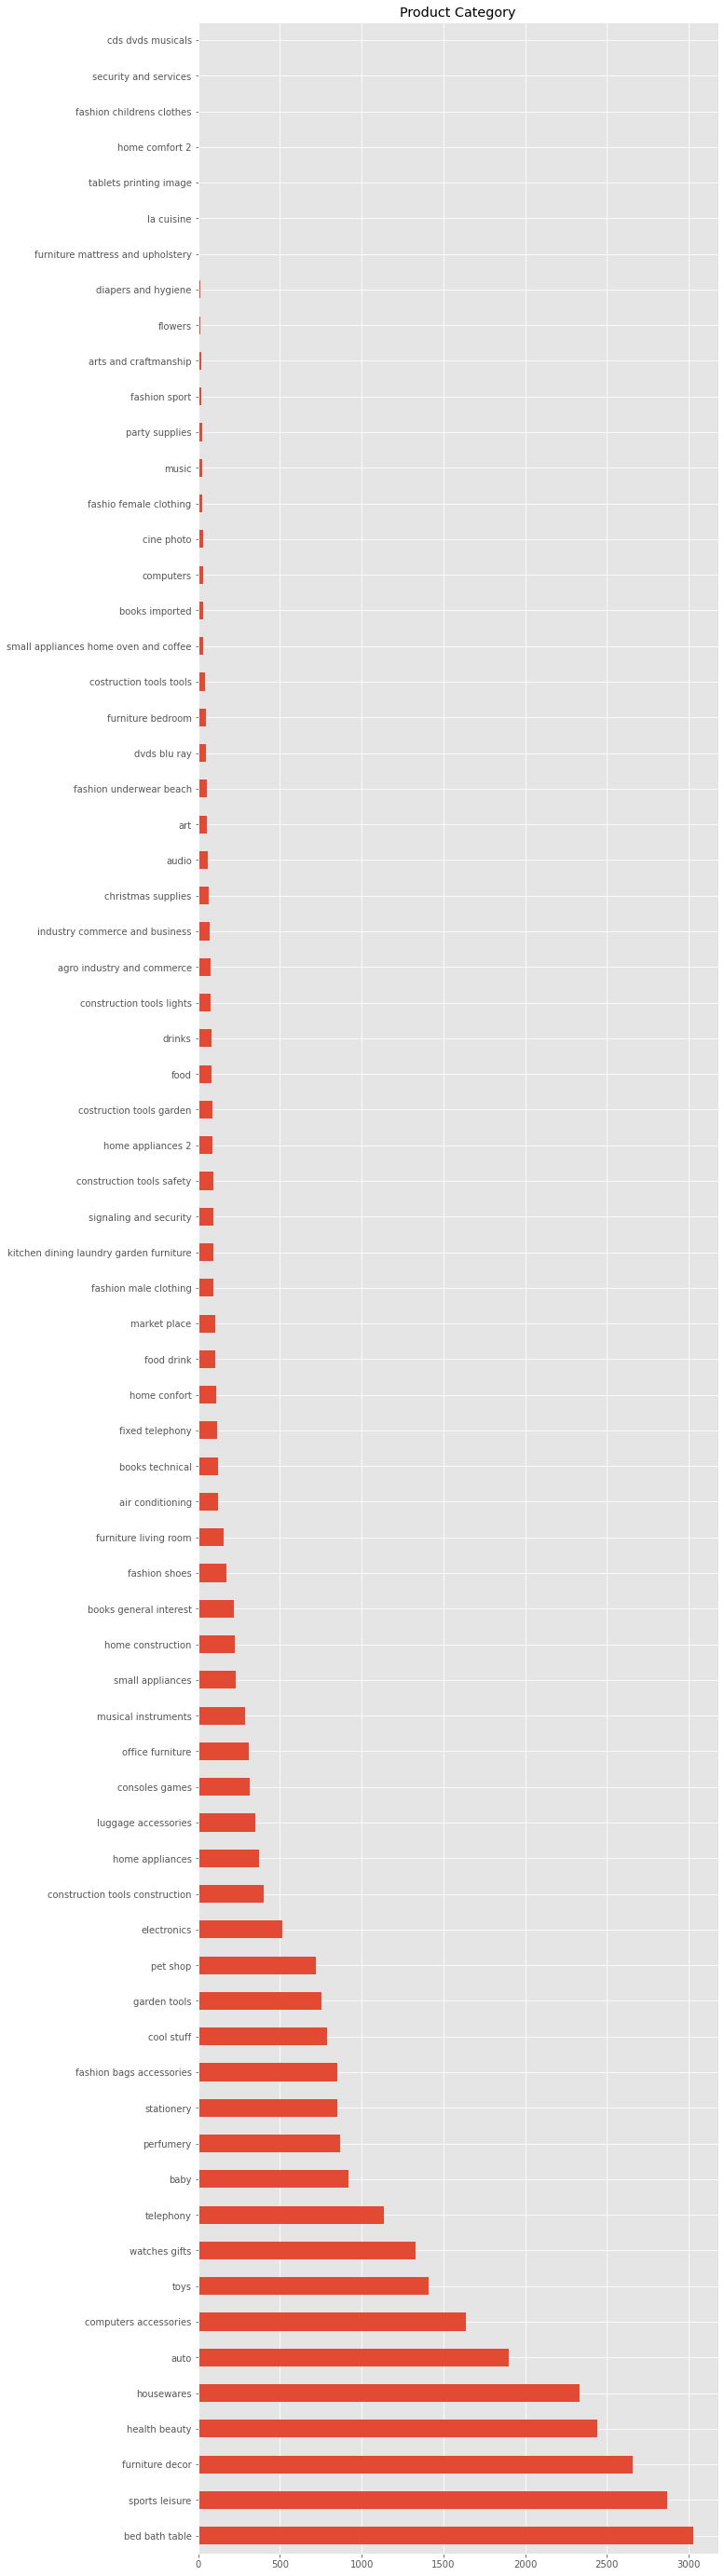

In [50]:
#Statistical sales of different product types
import matplotlib.pyplot as plt
plt.subplots()
product_total.plot(kind='barh',figsize=(10,50),title='Product Category')
plt.show

In [43]:
#Top 10 selling product categories as a percentage of total orders20745
t=pd.DataFrame()
t=product_totalDf.head(10)
Total_Percentage=str(round(t['product_category_name_english'].sum()/prdt.shape[0],2)*100)+'%'
print('Top 10 selling product categories as a percentage of total orders:',Total_Percentage)

Top 10 selling product categories as a percentage of total orders: 63.0%


<function matplotlib.pyplot.show(*args, **kw)>

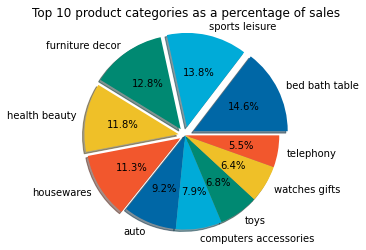

In [36]:
#This pie chart shows us the top ten selling products as a percentage of the total sales of these ten products
from matplotlib import pyplot as plt
plt.figure()
colors = ['#0067a6','#00abd8','#008972','#efc028','#f2572d']
plt.pie(product_totalDf['product_category_name_english'].head(10),
       explode=[0.1,0.09,0.08,0.07,0.06,0.0,0.0,0.0,0.0,0.0],
       autopct='%1.1f%%',
       colors = colors,
       labels = ['bed bath table','sports leisure','furniture decor','health beauty','housewares','auto','computers accessories','toys','watches gifts','telephony'],      shadow=True,
       startangle=0,
       radius=1)
plt.axis('equal')
plt.title('Top 10 product categories as a percentage of sales')
#Display graphics
plt.show()

### Sellers Level

### Orders Level

### Customer Level

## 4 Machine Learning Modelling

## 5 Result Evaluation + Interpretation

## 6 Members’ Contribution